In [1]:
#Dependencies
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import Data
datafile = 'Resources/IowaData.csv'
df = pd.read_csv(datafile)

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#Get Columns
cols = [c for c in df.columns]

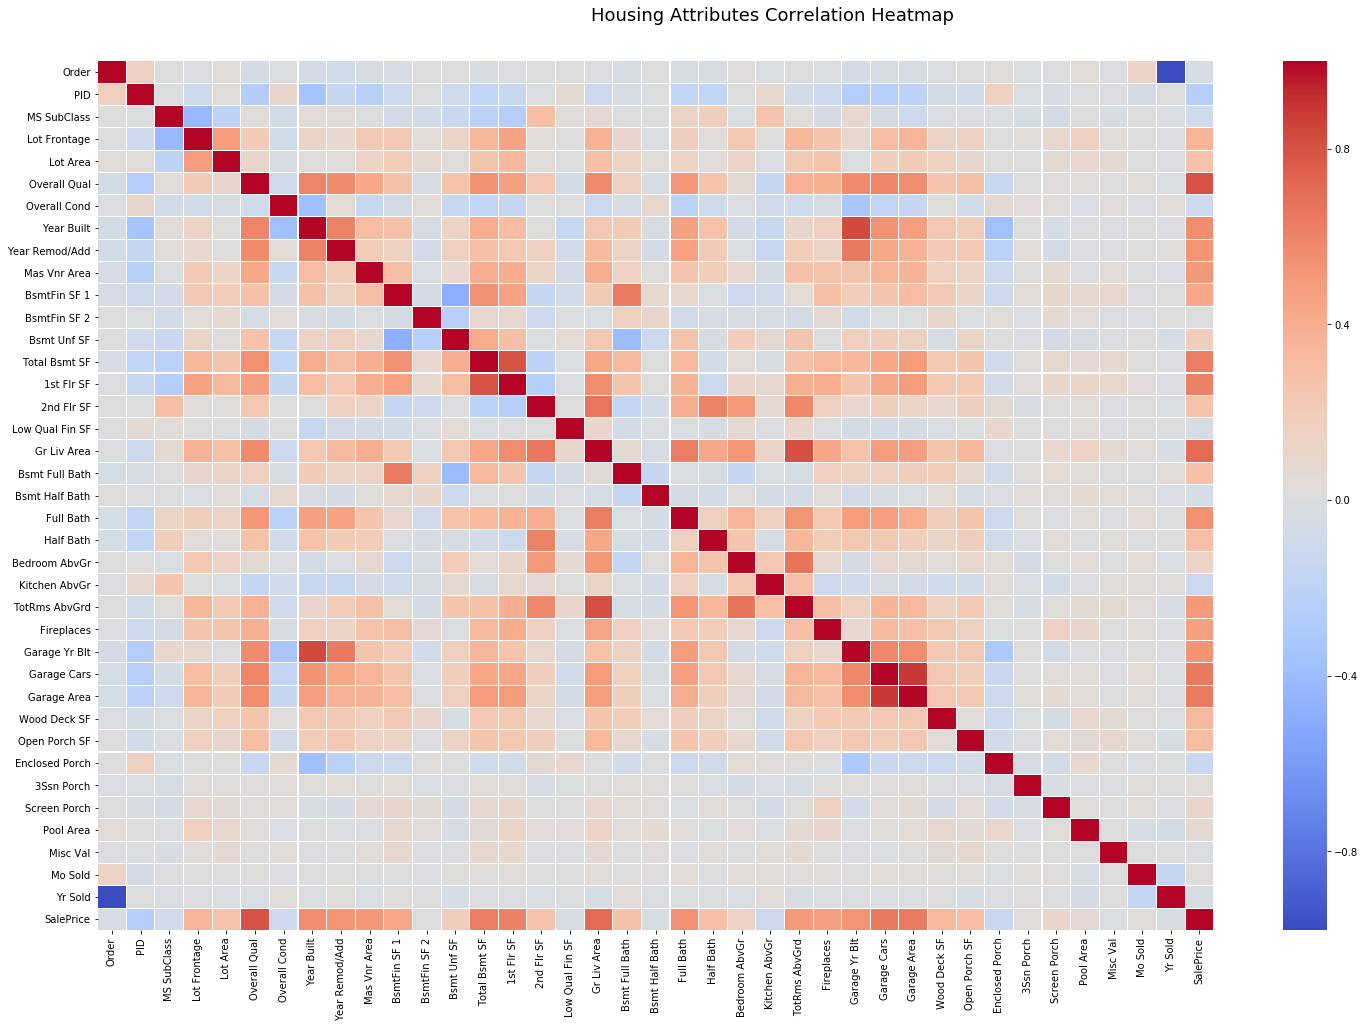

In [9]:
# Plot Heatmap To See Correlation of Numerical Features
f, ax = plt.subplots(figsize=(25, 15))
corr = df[cols].corr()


hm = sns.heatmap(round(corr,2), annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05) 
f.subplots_adjust(top=0.93)
t= f.suptitle('Housing Attributes Correlation Heatmap', fontsize=18)

f.savefig('Images/Corr_HM.png')


In [24]:
#Cut Columns To Selected Features
df_short = df[['Lot Frontage','Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1','Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF','SalePrice'] ]
df_short.head()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,31770,6,1960,1960,112.0,639.0,441.0,1080.0,1656,...,1,0,7,2,1960.0,2.0,528.0,210,62,215000
1,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,1,0,5,0,1961.0,1.0,730.0,140,0,105000
2,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1,1,6,0,1958.0,1.0,312.0,393,36,172000
3,93.0,11160,7,1968,1968,0.0,1065.0,1045.0,2110.0,2110,...,2,1,8,2,1968.0,2.0,522.0,0,0,244000
4,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,2,1,6,1,1997.0,2.0,482.0,212,34,189900


In [25]:
#See what columns have missing values
missing_df = df_short.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df = missing_df.groupby('column_name').sum()
missing_df = missing_df.sort_values(by='missing_count', ascending = False)


missing_df.head(10)

,missing_count
column_name,
Lot Frontage,490
Garage Yr Blt,159
Mas Vnr Area,23
Bsmt Unf SF,1
BsmtFin SF 1,1
Garage Area,1
Garage Cars,1
Total Bsmt SF,1


In [26]:
#Replace missing values
df_final = df_short.drop('Garage Yr Blt', axis = 1)
df_final.loc[df['Lot Frontage'].isnull(), 'Lot Frontage'] = 0
df_final.loc[df['Mas Vnr Area'].isnull(), 'Mas Vnr Area'] = 0
df_final.loc[df['Bsmt Unf SF'].isnull(), 'Bsmt Unf SF'] = 0
df_final.loc[df['BsmtFin SF 1'].isnull(), 'BsmtFin SF 1'] = 0
df_final.loc[df['Garage Area'].isnull(), 'Garage Area'] = 0
df_final.loc[df['Garage Cars'].isnull(), 'Garage Cars'] = 0
df_final.loc[df['Total Bsmt SF'].isnull(), 'Total Bsmt SF'] = 0

#Check Missing again
missing_df = df_final.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df = missing_df.groupby('column_name').sum()
missing_df = missing_df.sort_values(by='missing_count', ascending = False)


missing_df.head(10)

,missing_count
column_name,


In [27]:
df_final.head()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,31770,6,1960,1960,112.0,639.0,441.0,1080.0,1656,...,1656,1,0,7,2,2.0,528.0,210,62,215000
1,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,896,1,0,5,0,1.0,730.0,140,0,105000
2,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1329,1,1,6,0,1.0,312.0,393,36,172000
3,93.0,11160,7,1968,1968,0.0,1065.0,1045.0,2110.0,2110,...,2110,2,1,8,2,2.0,522.0,0,0,244000
4,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1629,2,1,6,1,2.0,482.0,212,34,189900


In [28]:
df_final.to_csv('Resources/IowaCleanData.csv', index=False)